# Structure

In order to carry out any simulations using the `udkm1Dsim` package, an according one-dimensional `Structure` needs to be created in advance.

This `Structure` object can consists of one or many sub-structures and/or `Layers` of type `UnitCell` or `AmorphousLayer`.

`UnitCell`s and `AmorphousLayer`s consist of the fundamental building blocks, namely `Atom`s and `AtomMixed`.

In this example the basic concepts of creating the above mentioned objects are introduced. Furthermore one should easily see how to set and access all the physical properties of these physical objects.

## Setup

Do all necessary imports and settings.

In [17]:
import udkm1Dsim as ud
u = ud.u  # import the pint unit registry from udkm1Dsim
import scipy.constants as constants
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
u.setup_matplotlib()  # use matplotlib with pint units

## Atoms

The `atoms` module contains two classes: `Atom` and `AtomMixed`.

### Atom

The `Atom` object represents a real physical atom as it can be found in the periodic table.
Accordingly, it is initialized with the required `symbol` of the element.
Then all necessary data are loaded from parameter files linked to this element.

An optional `ID` can be given as _keyword parameter_ if atoms of the same element but with different properties are used.
Another keyword argument is the `ionicity` of the atom, which has to be present in the parameter files.

The magnetization of every atom can be set by the three _keyword parameters_
* `mag_amplitude`
* `mag_phi`
* `mag_gamma`

If no individual paths to the atomic- and/or magnetic scattering factors are given, by `atomic_form_factor_path` and `magnetic_form_factor_path`, respectively, the defaults parameters are used from the 
_Chantler tables_:

C.T. Chantler, K. Olsen, R.A. Dragoset, J. Chang, A.R. Kishore, S.A. Kotochigova, & D.S. Zucker,  
*Detailed Tabulation of Atomic Form Factors, Photoelectric Absorption and Scattering Cross Section, and Mass Attenuation Coefficients for Z = 1-92 from E = 1-10 eV to E = 0.4-1.0 MeV*  
[NIST Standard Reference Database 66.](https://dx.doi.org/10.18434/T4HS32)

as well as [Project Dyna](https://neel.cnrs.frspip.php/?rubrique1008&lang=en), respectively

In [18]:
O = ud.Atom('O')
Om1 = ud.Atom('O', id='Om1', ionicity=-1)
Om2 = ud.Atom('O', id='Om2', ionicity=-2)
Fe = ud.Atom('Fe', mag_amplitude=1, mag_phi=0*u.deg, mag_gamma=90*u.deg)
Cr = ud.Atom('Cr')
Ti = ud.Atom('Ti')
Sr = ud.Atom('Sr')
Ru = ud.Atom('Ru')
Pb = ud.Atom('Pb')
Zr = ud.Atom('Zr')

One can easily print all properties of a single atom:

In [19]:
print(Sr)

Atom with the following properties
=================  =================================
               id  Sr
           symbol  Sr
             name  Strontium
  atomic number Z  38
    mass number A  87.62
             mass  1.455×10⁻²⁵ kg
         ionicity  0
Cromer Mann coeff  [38.      0.     17.5663  9.8184]
               ..  [ 5.422   2.6694  1.5564 14.0988]
               ..  [  0.1664 132.376    2.5064]
  magn. amplitude  0
        magn. phi  0.0 deg
      magn. gamma  0.0 deg
=================  =================================


Or just a single property:

In [20]:
print(Ti.mass)

7.948502350094219×10⁻²⁶ kg


### Mixed Atom

The `AtomMixed` class allows for solid solutions that can easily achieved by the following lines of code.
The input for the initialization of the `AtomMixed` object are the `symbol`, `id`, and `name`, whereas only the first is required.

In [21]:
ZT = ud.AtomMixed('ZT', id='ZT', name='Zircon-Titan 0.2 0.8')
ZT.add_atom(Zr, 0.2)
ZT.add_atom(Ti, 0.8)
print(ZT)

AtomMixed with the following properties
===============  ====================
             id  ZT
         symbol  ZT
           name  Zircon-Titan 0.2 0.8
atomic number Z  25.6
  mass number A  56.538399999999996
           mass  9.388×10⁻²⁶ kg
       ionicity  0.0
magn. amplitude  0
      magn. phi  0.0 deg
    magn. gamma  0.0 deg
===============  ====================
2 Constituents:
---------  ------
Zirconium  20.0 %
 Titanium  80.0 %
---------  ------


## Layers

The atoms created above can be used to build `Layer`s.
There are two types of layers available: `AmorphousLayer` and crystalline `UnitCell`.
Both share many common physical properties which are relevant for the later simulations.
Please refer to a complete list or properties and methods in the __API documentation__.

### Amorphous Layers

The `AmorphousLayer` must be initialized with an `id`, `name`, `thickness`, and `density`.
All other properties are optional and must be set to carry out the according simulations.

In [22]:
amorph_Fe = ud.AmorphousLayer('amorph_Fe', 'amorph_Fe',
                              20*u.nm, 7.874*u.g/u.cm**3)
# print the layer properties
print(amorph_Fe)

Amorphous layer with the following properties

========================  ===============
               parameter  value
========================  ===============
                      id  amorph_Fe
                    name  amorph_Fe
               thickness  20.0 nm
                    area  0.01 nm²
                  volume  0.2 nm³
                    mass  1.5748×10⁻²⁴ kg
      mass per unit area  1.5748×10⁻²⁴ kg
                 density  7.874×10³ kg/m³
               roughness  0.0 nm
     Debye Waller Factor  0 m²
          sound velocity  0.0 m/s
         spring constant  [0.0] kg/s²
          phonon damping  0.0 kg/s
         opt. pen. depth  0.0 nm
   opt. refractive index  0
  opt. ref. index/strain  0
        thermal conduct.  0 W/(m K)
linear thermal expansion  0
           heat capacity  0 J/(kg K)
      subsystem coupling  0 W/m³
             no atom set
========================  ===============


The physical properties can be also given during initialization using a `dict`:

In [23]:
params = {
    'opt_pen_depth': 10*u.nm,
    'sound_vel': 5*(u.nm/u.ps),
}

amorph_Cr = ud.AmorphousLayer('amorph_Cr', 'amorph_Cr',
                              40*u.nm, 7.14*u.g/u.cm**3, atom=Cr, **params)
# print the layer properties
print(amorph_Cr)

Amorphous layer with the following properties

========================  ===========================
               parameter  value
========================  ===========================
                      id  amorph_Cr
                    name  amorph_Cr
               thickness  40.0 nm
                    area  0.01 nm²
                  volume  0.4 nm³
                    mass  2.856×10⁻²⁴ kg
      mass per unit area  2.856×10⁻²⁴ kg
                 density  7.14×10³ kg/m³
               roughness  0.0 nm
     Debye Waller Factor  0 m²
          sound velocity  5×10³ m/s
         spring constant  [0.04462500000000001] kg/s²
          phonon damping  0.0 kg/s
         opt. pen. depth  9.999999999999998 nm
   opt. refractive index  0
  opt. ref. index/strain  0
        thermal conduct.  0 W/(m K)
linear thermal expansion  0
           heat capacity  0 J/(kg K)
      subsystem coupling  0 W/m³
                    atom  Chromium
           magnetization
               amplitude  0
 

### Unit Cells

The `UnitCell` requires an `id`, `name`, and `c_axis` upon initialization.
Multiple atoms can be added to relative positions along the _c_-Axis in the 1D `UnitCell`.
Note that all temperature-dependent properties can be given either as scalar (constant) value or as string that represents a temperature-dependent _lambda_-function:

In [24]:
# c-axis lattice constants of the two layers
c_STO_sub = 3.905*u.angstrom
c_SRO = 3.94897*u.angstrom
# sound velocities [nm/ps] of the two layers
sv_SRO = 6.312*u.nm/u.ps
sv_STO = 7.800*u.nm/u.ps

# SRO layer
prop_SRO = {}
prop_SRO['a_axis'] = c_STO_sub  # a-Axis
prop_SRO['b_axis'] = c_STO_sub  # b-Axis
prop_SRO['deb_Wa l_Fac'] = 0  # Debye-Waller factor
prop_SRO['sound_ve l'] = sv_SRO  # sound velocity
prop_SRO['opt_ref_index'] = 2.44+4.32j
prop_SRO['therm_ond'] = 5.72*u.W/(u.m*u.K)  # heat conductivity
prop_SRO['lin_therm_ exp'] = 1.03e-5  # linear thermal expansion
prop_SRO['heat_capacity'] = '455.2 + 0.112*T  - 2.1935e6/T**2'  # [J/kg K]

SRO = ud.UnitCell('SRO', 'Strontium Ruthenate', c_SRO, **prop_SRO)
SRO.add_atom(O, 0)
SRO.add_atom(Sr, 0)
SRO.add_atom(O, 0.5)
SRO.add_atom(O, 0.5)
SRO.add_atom(Ru, 0.5)

print(SRO)

Unit Cell with the following properties

========================  =========================================
               parameter  value
========================  =========================================
                      id  SRO
                    name  Strontium Ruthenate
                  a-axis  0.3905 nm
                  b-axis  0.3905 nm
                  c-axis  0.3949 nm
                    area  0.1525 nm²
                  volume  0.06022 nm³
                    mass  3.93×10⁻²⁵ kg
      mass per unit area  2.577×10⁻²⁶ kg
                    area  0.1525 nm²
                  volume  0.06022 nm³
                    mass  3.930300027032341×10⁻²⁵ kg
      mass per unit area  2.5774107046400294×10⁻²⁶ kg
                 density  6.527×10³ kg/m³
               roughness  0.0 nm
     Debye Waller Factor  0 m²
          sound velocity  0.0 m/s
         spring constant  [0.0] kg/s²
          phonon damping  0.0 kg/s
         opt. pen. depth  0.0 nm
   opt. refractive inde

#### Non-Linear Strain Dependence
In general the position of each atom in a unit cell depends linearly from an external strain.
In some cases this linear behavior has to be altered.
This can be easily achieved by providing a string representation of a strain-dependent _lambda_-function for the atom position when the atom is added to the unit cell.

In [25]:
# STO substrate
prop_STO_sub = {}
prop_STO_sub['a_axis'] = c_STO_sub  # a-Axis
prop_STO_sub['b_axis'] = c_STO_sub  # b-Axis
prop_STO_sub['deb_Wal_Fac'] = 0  # Debye-Waller factor
prop_STO_sub['sound_vel'] = sv_STO  # sound velocity
prop_STO_sub['opt_ref_index'] = 2.1+0j
prop_STO_sub['therm_cond'] = 12*u.W/(u.m *u.K)  # heat conductivity
prop_STO_sub['lin_therm_exp'] = 1e-5  # linear thermal expansion
prop_STO_sub['heat_capacity'] = '733.73 + 0.0248*T - 6.531e6/T**2'  # [J/kg K]

STO_sub = ud.UnitCell('STOsub', 'Strontium Titanate Substrate',
                      c_STO_sub, **prop_STO_sub)
STO_sub.add_atom(O, '0.1*(s**2+1)')
STO_sub.add_atom(Sr, 0)
STO_sub.add_atom(O, 0.5)
STO_sub.add_atom(O, 0.5)
STO_sub.add_atom(Ti, 0.5)

print(STO_sub)

Unit Cell with the following properties

========================  =========================================
               parameter  value
========================  =========================================
                      id  STOsub
                    name  Strontium Titanate Substrate
                  a-axis  0.3905 nm
                  b-axis  0.3905 nm
                  c-axis  0.3905 nm
                    area  0.1525 nm²
                  volume  0.05955 nm³
                    mass  3.047×10⁻²⁵ kg
      mass per unit area  1.998×10⁻²⁶ kg
                    area  0.1525 nm²
                  volume  0.05955 nm³
                    mass  3.046843427429143×10⁻²⁵ kg
      mass per unit area  1.9980578610298977×10⁻²⁶ kg
                 density  5.117×10³ kg/m³
               roughness  0.0 nm
     Debye Waller Factor  0 m²
          sound velocity  7.8×10³ m/s
         spring constant  [7.971777885147345] kg/s²
          phonon damping  0.0 kg/s
         opt. pen. depth 

A simple visualization is also available:

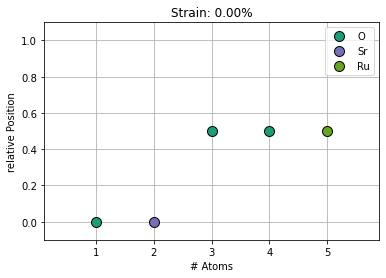

In [26]:
SRO.visualize()

## Structure

The `AmorphousLayer` and `UnitCell` can now be added to an actual structure:

Structure properties:

Name   : Single Layer
Thickness : 429.99 nanometer
Roughness : 0.00 nanometer
----
100 times Strontium Ruthenate: 39.49 nanometer
1000 times Strontium Titanate Substrate: 390.50 nanometer
----
no substrate



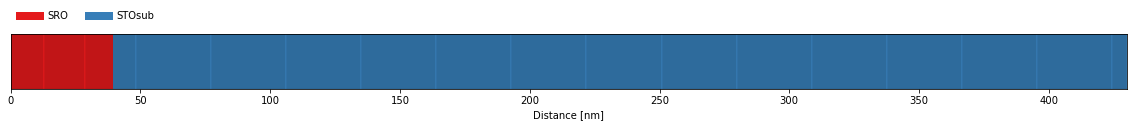

In [27]:
S = ud.Structure('Single Layer')
S.add_sub_structure(SRO, 100)  # add 100 layers of SRO to sample
S.add_sub_structure(STO_sub, 1000)  # add 1000 layers of STO substrate

print(S)

S.visualize()

There are various methods available to determine specific properties of a `Structure`, please also refer to the __API documentation__ for more details:

In [28]:
[d_start, d_end, d_mid] = S.get_distances_of_layers()
K = S.get_number_of_sub_structures()
L = S.get_number_of_unique_layers()
M = S.get_number_of_layers()
P = S.get_all_positions_per_unique_layer()
I = S.get_distances_of_interfaces()
c_axis = S.get_layer_property_vector('c_axis')

The `Structure` class also allows to nest multiple substructures in order to build more complex samples easily:

Structure properties:

Name   : Super Lattice
Thickness : 332.58 nanometer
Roughness : 0.00 nanometer
----
sub-structure 10 times:
	Structure properties:

	Name   : Double Layer
	Thickness : 13.73 nanometer
	Roughness : 0.00 nanometer
	----
	15 times Strontium Ruthenate: 5.92 nanometer
	20 times Strontium Titanate Substrate: 7.81 nanometer
	----
	no substrate
500 times Strontium Titanate Substrate: 195.25 nanometer
----
no substrate



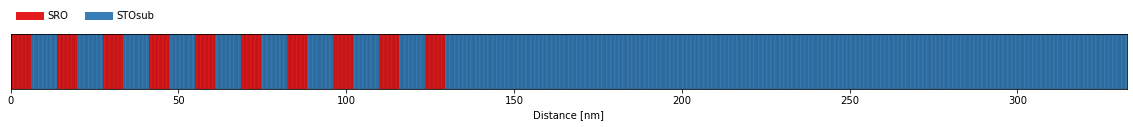

In [29]:
S2 = ud.Structure('Super Lattice')
# define a single double layer
DL = ud.Structure('Double Layer')
DL.add_sub_structure(SRO, 15)  # add 15 layers of SRO
DL.add_sub_structure(STO_sub, 20)  # add 20 layers of STO substrate

# add the double layer to the super lattice
S2.add_sub_structure(DL, 10)  # add 10 double layers to super lattice
S2.add_sub_structure(STO_sub, 500)  # add 500 layers of STO substrate

print(S2)

S2.visualize()

There a few more interfaces than before (includes also the top and bottom interface):

In [30]:
I2 = S2.get_distances_of_interfaces();
print(len(I2))

21


## Static Substrate

Mainly for X-ray scattering simulations it might be helpful to add a `static` substrate to the structure, which is not included in the `dynamic` simulations of `heat`, `phonons`, and `magnetization`.
Hence the simulation time can be kept short while the scattering result include thick substrate contributions.

Structure properties:

Name   : Super Lattice
Thickness : 332.58 nanometer
Roughness : 0.00 nanometer
----
sub-structure 10 times:
	Structure properties:

	Name   : Double Layer
	Thickness : 13.73 nanometer
	Roughness : 0.00 nanometer
	----
	15 times Strontium Ruthenate: 5.92 nanometer
	20 times Strontium Titanate Substrate: 7.81 nanometer
	----
	no substrate
500 times Strontium Titanate Substrate: 195.25 nanometer
----
Substrate:
----
1000000 times Strontium Titanate Substrate: 390500.00 nanometer



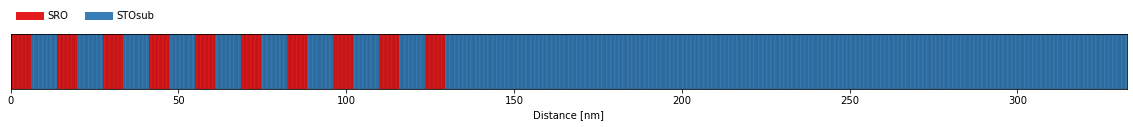

In [31]:
substrate = ud.Structure('Static Substrate')
substrate.add_sub_structure(STO_sub, 1000000)

S2.add_substrate(substrate)

print(S2)

S2.visualize()